# covid prediction

In [167]:
import numpy as np 
import pandas as pd 

from plotly.offline import iplot
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('aggregate_covid_country.csv')

In [3]:
df.head()

Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
3  2020-01-22      Andorra          0          0       0
4  2020-01-22       Angola          0          0       0

In [4]:
df.tail()

Date             Country  Confirmed  Recovered  Deaths
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4

In [5]:
df.describe()

Confirmed      Recovered        Deaths
count  2.368800e+04   23688.000000  23688.000000
mean   7.969368e+03    2581.801714    526.935030
std    5.842109e+04   15143.101257   3992.815956
min    0.000000e+00       0.000000      0.000000
25%    0.000000e+00       0.000000      0.000000
50%    1.800000e+01       1.000000      0.000000
75%    7.300000e+02     123.000000     13.000000
max    1.680913e+06  384902.000000  98913.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
df.keys()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

<AxesSubplot:>

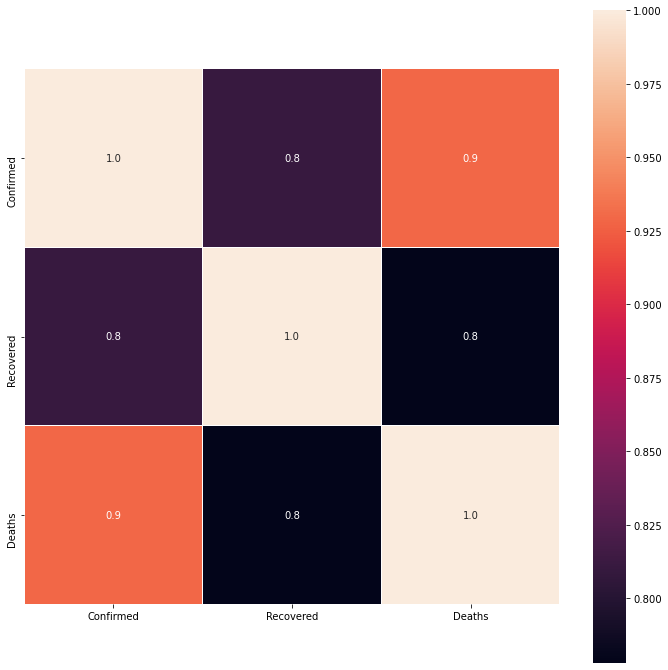

In [10]:
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

In [11]:
dt = df.Deaths.value_counts().index
print(dt)

Int64Index([    0,     1,     2,     3,     4,     6,     7,    10,     5,
                8,
            ...
            29079, 32785,   441,   457,  2520,   473,  4603,   521,  2600,
            30689],
           dtype='int64', length=1768)


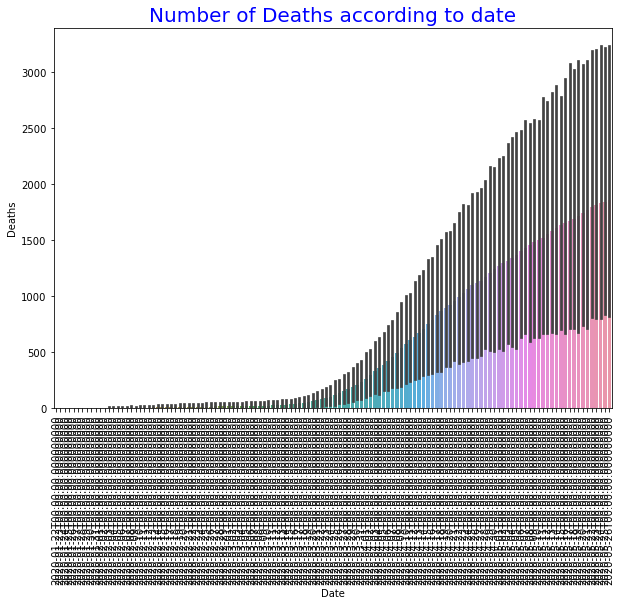

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(x = df.Date, y = df.Deaths)
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Deaths')
plt.title('Number of Deaths according to date', color = 'blue', fontsize = 20)
plt.show()

In [13]:
confirmed = df["Confirmed"]
recovered = df['Recovered']
deaths = df['Deaths']
dates = df['Date']

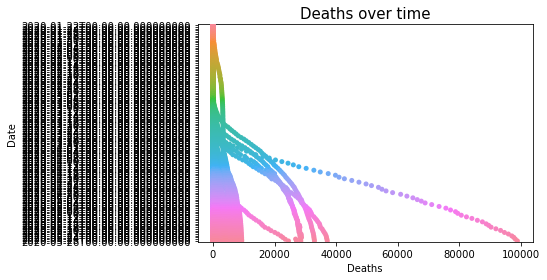

In [14]:
x = sns.stripplot(x = deaths, y = dates , data = df, jitter = True)
plt.title("Deaths over time", fontsize = 15)
plt.show()

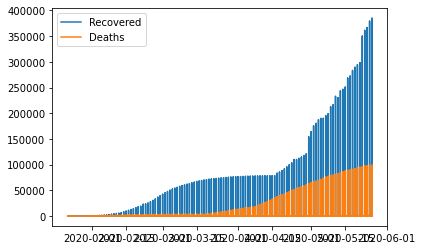

In [15]:
plt.plot(dates,recovered,label="Recovered")
plt.plot(dates,deaths,label="Deaths")
plt.legend()

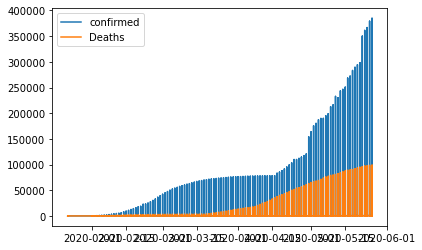

In [16]:
plt.plot(dates,recovered,label="confirmed")
plt.plot(dates,deaths,label="Deaths")
plt.legend()

In [17]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [18]:
df

Date             Country  Confirmed  Recovered  Deaths  Active
0     2020-01-22         Afghanistan          0          0       0       0
1     2020-01-22             Albania          0          0       0       0
2     2020-01-22             Algeria          0          0       0       0
3     2020-01-22             Andorra          0          0       0       0
4     2020-01-22              Angola          0          0       0       0
...          ...                 ...        ...        ...     ...     ...
23683 2020-05-26  West Bank and Gaza        429        365       3      61
23684 2020-05-26      Western Sahara          9          6       1       2
23685 2020-05-26               Yemen        249         10      49     190
23686 2020-05-26              Zambia        920        336       7     577
23687 2020-05-26            Zimbabwe         56         25       4      27

[23688 rows x 6 columns]

In [19]:
df_grouped = df.groupby(['Date', 'Country'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [20]:
df_grouped

Date             Country  Confirmed  Deaths  Recovered  Active
0     2020-01-22         Afghanistan          0       0          0       0
1     2020-01-22             Albania          0       0          0       0
2     2020-01-22             Algeria          0       0          0       0
3     2020-01-22             Andorra          0       0          0       0
4     2020-01-22              Angola          0       0          0       0
...          ...                 ...        ...     ...        ...     ...
23683 2020-05-26  West Bank and Gaza        429       3        365      61
23684 2020-05-26      Western Sahara          9       1          6       2
23685 2020-05-26               Yemen        249      49         10     190
23686 2020-05-26              Zambia        920       7        336     577
23687 2020-05-26            Zimbabwe         56       4         25      27

[23688 rows x 6 columns]

In [21]:
# new cases 
temp = df_grouped.groupby(['Country', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country'] != temp['Country'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
df_grouped = pd.merge(df_grouped, temp, on=['Country', 'Date'])
# filling na with 0
df_grouped = df_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
df_grouped[cols] = df_grouped[cols].astype('int')
# 
df_grouped['New cases'] = df_grouped['New cases'].apply(lambda x: 0 if x<0 else x)


In [22]:
df_grouped

Date             Country  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22         Afghanistan          0       0          0       0   
1     2020-01-22             Albania          0       0          0       0   
2     2020-01-22             Algeria          0       0          0       0   
3     2020-01-22             Andorra          0       0          0       0   
4     2020-01-22              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
23683 2020-05-26  West Bank and Gaza        429       3        365      61   
23684 2020-05-26      Western Sahara          9       1          6       2   
23685 2020-05-26               Yemen        249      49         10     190   
23686 2020-05-26              Zambia        920       7        336     577   
23687 2020-05-26            Zimbabwe         56       4         25      27   

       New cases  New deaths  New recovered  
0              0           0              0  
1              0           0              0  
2              0           0              0  
3              0           0              0  
4              0           0              0  
...          ...         ...            ...  
23683          6           0              8  
23684          0           1              0  
23685         16           5              0  
23686          0           0              0  
23687          0           0              0  

[23688 rows x 9 columns]

In [23]:
# !pip install altair

In [24]:
import altair as alt
ind = df_grouped[df_grouped['Country'] == 'India']

In [25]:
base = alt.Chart(ind).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=400
)


In [26]:
red = alt.value("#f54242")
base.encode(y='Confirmed').properties(title='Total Confirmed for India') | base.encode(y='Deaths',color=red).properties(title="Total Deaths")

alt.HConcatChart(...)

In [27]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [28]:
import re
import numpy as np

countries_A = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
       'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan*',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

List = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".split(" ")
Countries = dict()
for i in List:
    Countries[i] = list()
    temp_list = []
    for j in countries_A:
        x = re.search(r"\A"+i+"\w+", j)
        if(x):
            temp_list.append(x.string)
    Countries[i] = temp_list

#### Plotting Alphabetically Country wise garphs

In [29]:
from IPython.display import display
def plot_altair(Countries_lst):
    selected_countries = df_grouped[df_grouped['Country'].isin(Countries_lst)]
    circle = alt.Chart(selected_countries,title=('Daily new cases For Countries Staring with '+i)).mark_circle().encode(
        x='monthdate(Date):O',
        y='Country',
        color='Country',
        size=alt.Size('New cases:Q',
            scale=alt.Scale(range=[0, 3000]),
            legend=alt.Legend(title='Daily new cases For Countries')
        ) 
    ).properties(
        width=500,
    )
    
    display(circle)

In [30]:
for i in List:
    if(Countries[i]!=[]):
        plot_altair(Countries[i])
    

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [42]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_grouped['Country']= label_encoder.fit_transform(df_grouped['Country']) 
df_grouped['Date']= label_encoder.fit_transform(df_grouped['Date']) 
  
df_grouped['Country'].unique()
# df_grouped['Date'].unique()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [84]:
confirmed_sum = df_grouped['Confirmed'].sum()
death_sum = df_grouped['Deaths'].sum()
recovered_sum = df_grouped['Recovered'].sum()

In [87]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
days_since_1_22

array([[    0],
       [    1],
       [    2],
       ...,
       [23685],
       [23686],
       [23687]])

In [156]:
X,Y = df_grouped.loc[:, df_grouped.columns != 'Deaths'] , df_grouped["Deaths"]

X_Confirmed = df_grouped[["Date","Country"]]
Y_Confirmed = df_grouped["Confirmed"]

X_Deaths = df_grouped[["Date","Confirmed","Recovered"]]
Y_Deaths = df_grouped["Deaths"]

# X.drop(["New cases","New deaths","New recovered","Recovered","Active"],axis=1, inplace=True)
# X.set_index('Date')

In [158]:
accuracy_score(df.Deaths,Y_Deaths)

1.0

In [182]:
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X_Deaths)
poly.fit(X_poly, Y_Deaths)

PolynomialFeatures()

In [183]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(X_poly,Y_Deaths)

In [184]:
x_train_confirmed

array([[1.000000e+00, 3.900000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 9.200000e+01, 3.090000e+02, ..., 9.548100e+04,
        2.379300e+04, 5.929000e+03],
       [1.000000e+00, 8.300000e+01, 7.470000e+02, ..., 5.580090e+05,
        3.212100e+04, 1.849000e+03],
       ...,
       [1.000000e+00, 5.500000e+01, 2.000000e+00, ..., 4.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.110000e+02, 1.661000e+03, ..., 2.758921e+06,
        2.873530e+05, 2.992900e+04],
       [1.000000e+00, 8.300000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [173]:
linear_model = LogisticRegression()
linear_model.fit(x_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(x_test_confirmed)

# linear_pred = linear_model.predict(future_forcast)


In [185]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test_confirmed,test_linear_pred), 2))

R2 score = -0.02


In [187]:
test_linear_pred.max()

0